In [1]:
# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 그래프 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
# plt.rcParams['font.family'] = 'AppleGothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

In [2]:
df1 = pd.read_csv('data/냉간단조_데이터셋_unique1_drop.csv')

In [3]:
df1['OUTPUT_COUNT_DIFF'] = df1['OUTPUT_COUNT_SUM'].diff()

In [4]:
df1['OUTPUT_COUNT_DIFF'].value_counts()

OUTPUT_COUNT_DIFF
 0.0        567664
 1.0         11514
 2.0            75
 3.0             6
 4.0             5
 5.0             3
 7.0             3
 57372.0         1
-57372.0         1
 31.0            1
 17.0            1
 20.0            1
 44.0            1
-28197.5         1
 13.0            1
 528.0           1
 28198.5         1
-65535.0         1
 64160.0         1
-64160.0         1
 63342.0         1
-63342.0         1
 31496.0         1
-31495.0         1
 27511.0         1
-62480.0         1
 61565.0         1
-61565.0         1
 59929.0         1
-59929.0         1
 59024.0         1
-59024.0         1
 62480.0         1
Name: count, dtype: int64

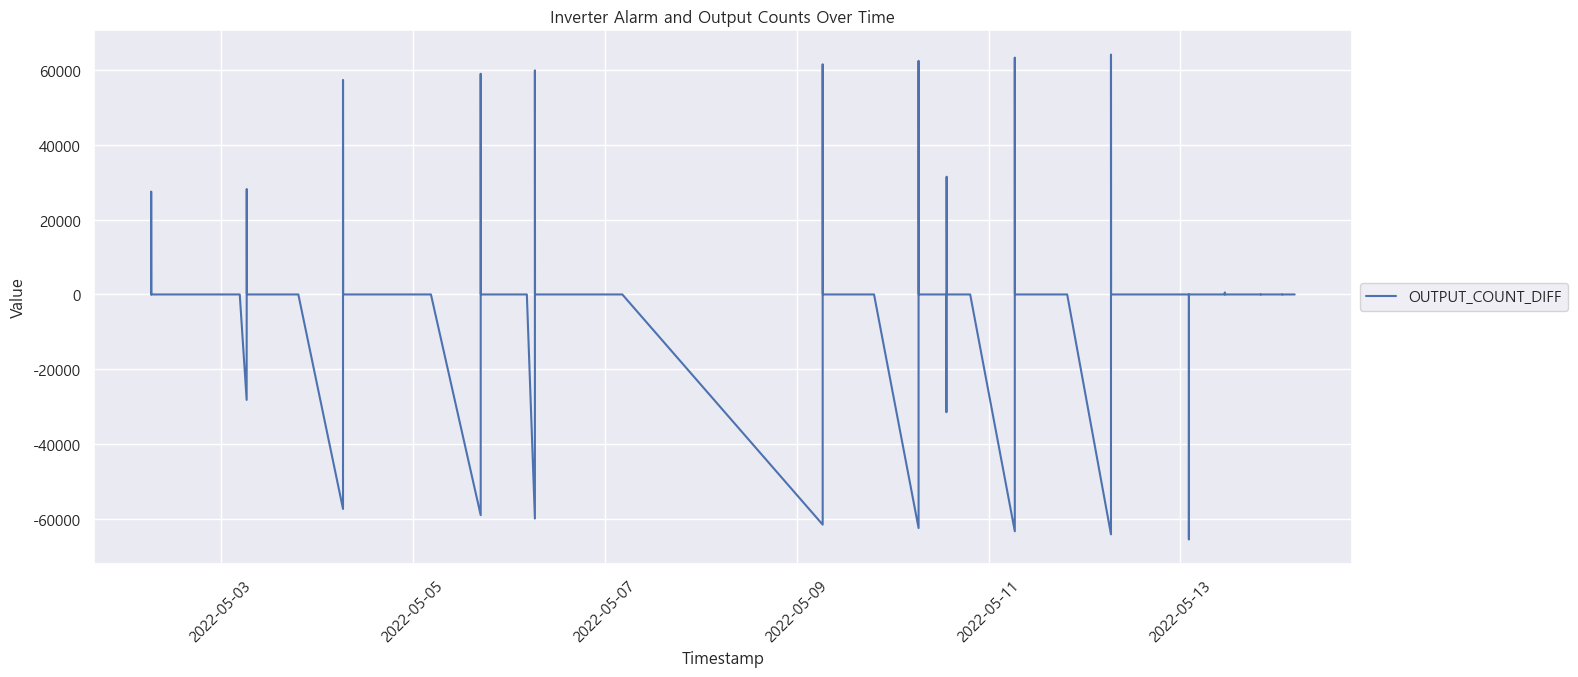

In [5]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = [
    'OUTPUT_COUNT_DIFF'
]

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df1['Timestamp'], df1[col], label=col)

# ✅ 4. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

### 2022-05-04 06:33:20 ~ 2022-05-05 16:59:23

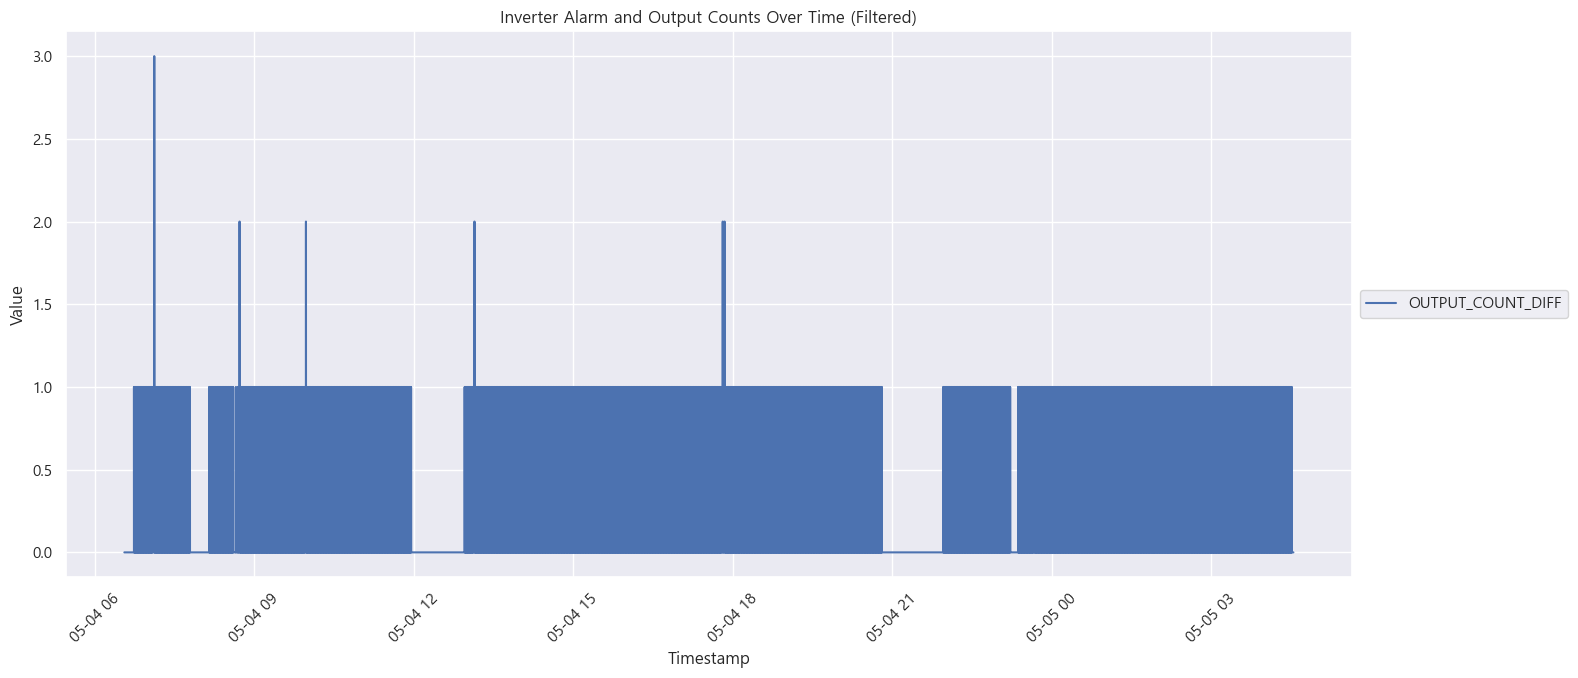

In [6]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

In [7]:
df_filtered['OUTPUT_COUNT_DIFF'].value_counts()

OUTPUT_COUNT_DIFF
0.0    77237
1.0     1639
2.0        5
3.0        1
Name: count, dtype: int64

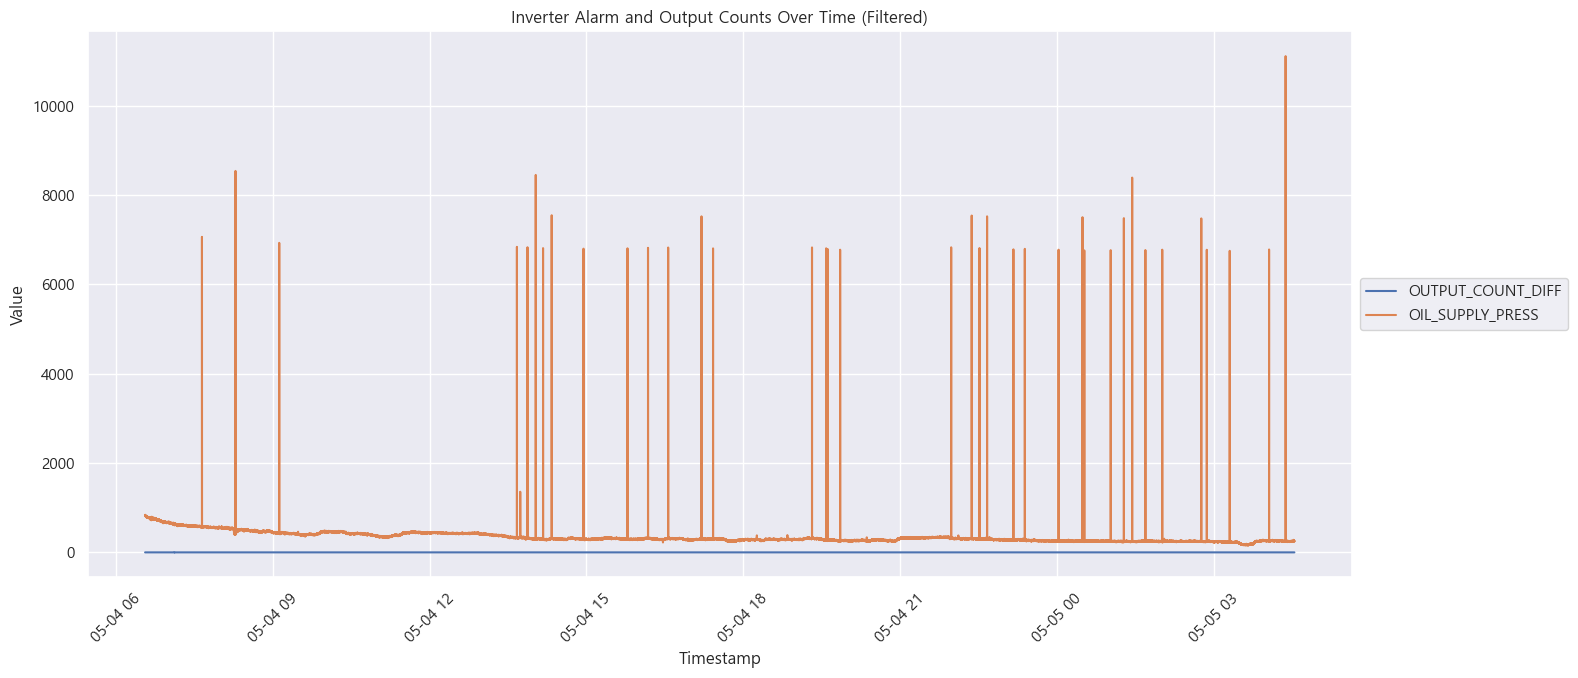

In [8]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF', 'OIL_SUPPLY_PRESS']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

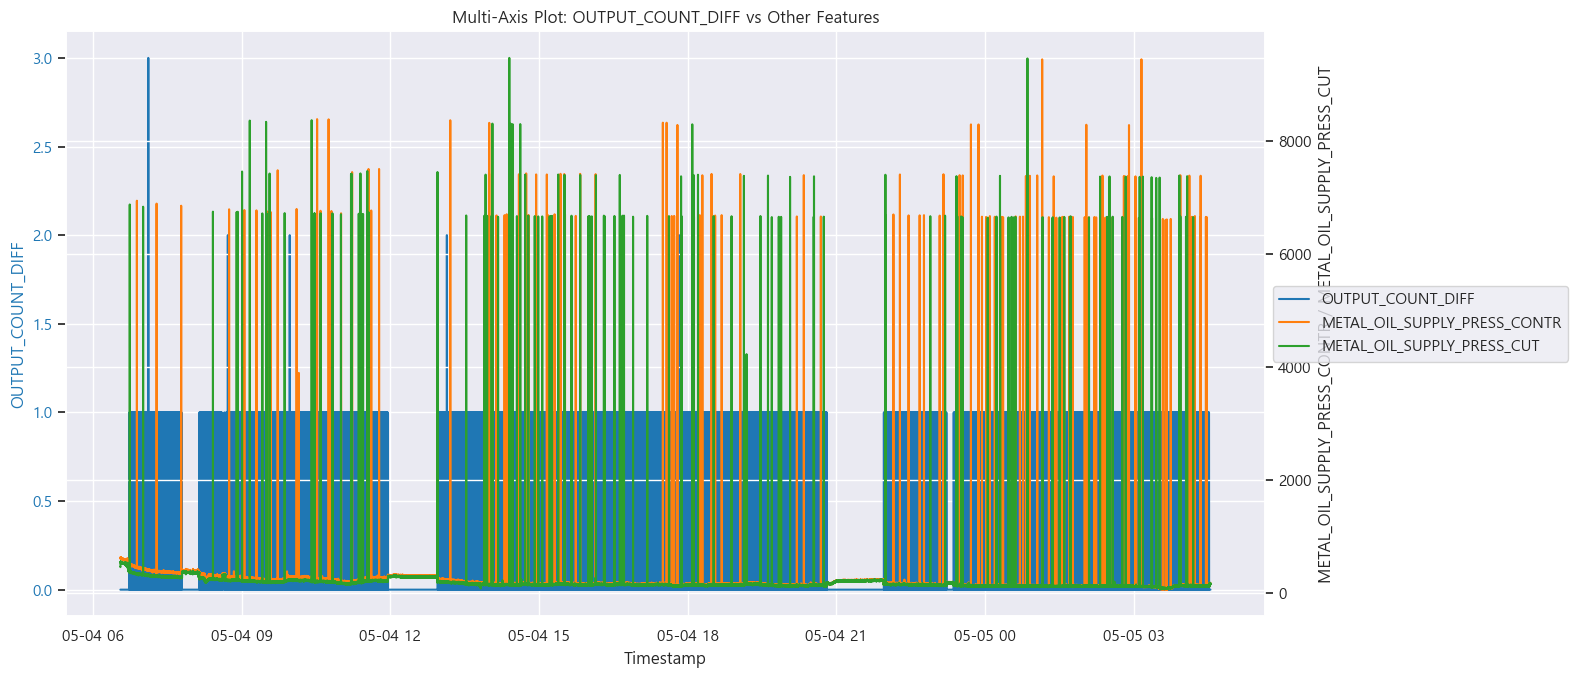

In [9]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['METAL_OIL_SUPPLY_PRESS_CONTR','METAL_OIL_SUPPLY_PRESS_CUT']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

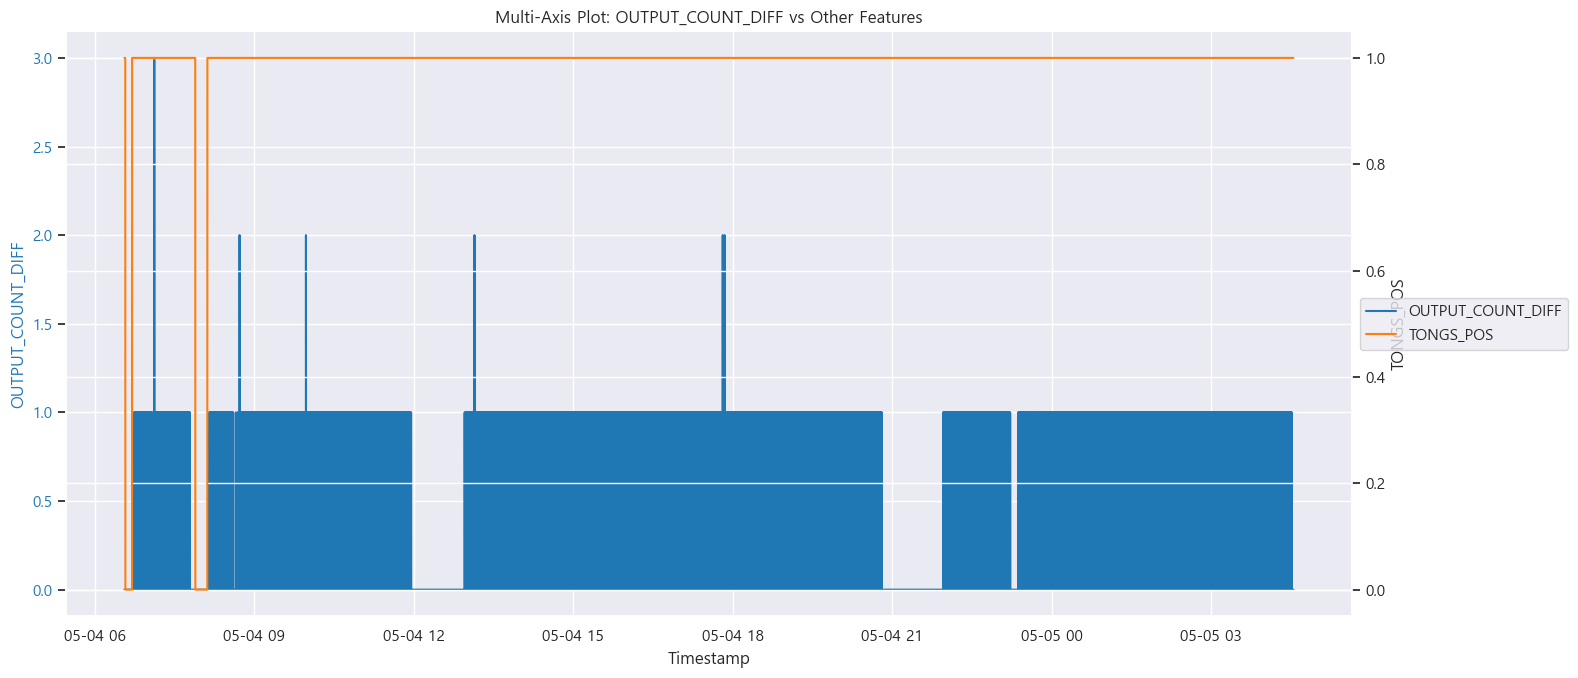

In [10]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['TONGS_POS']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

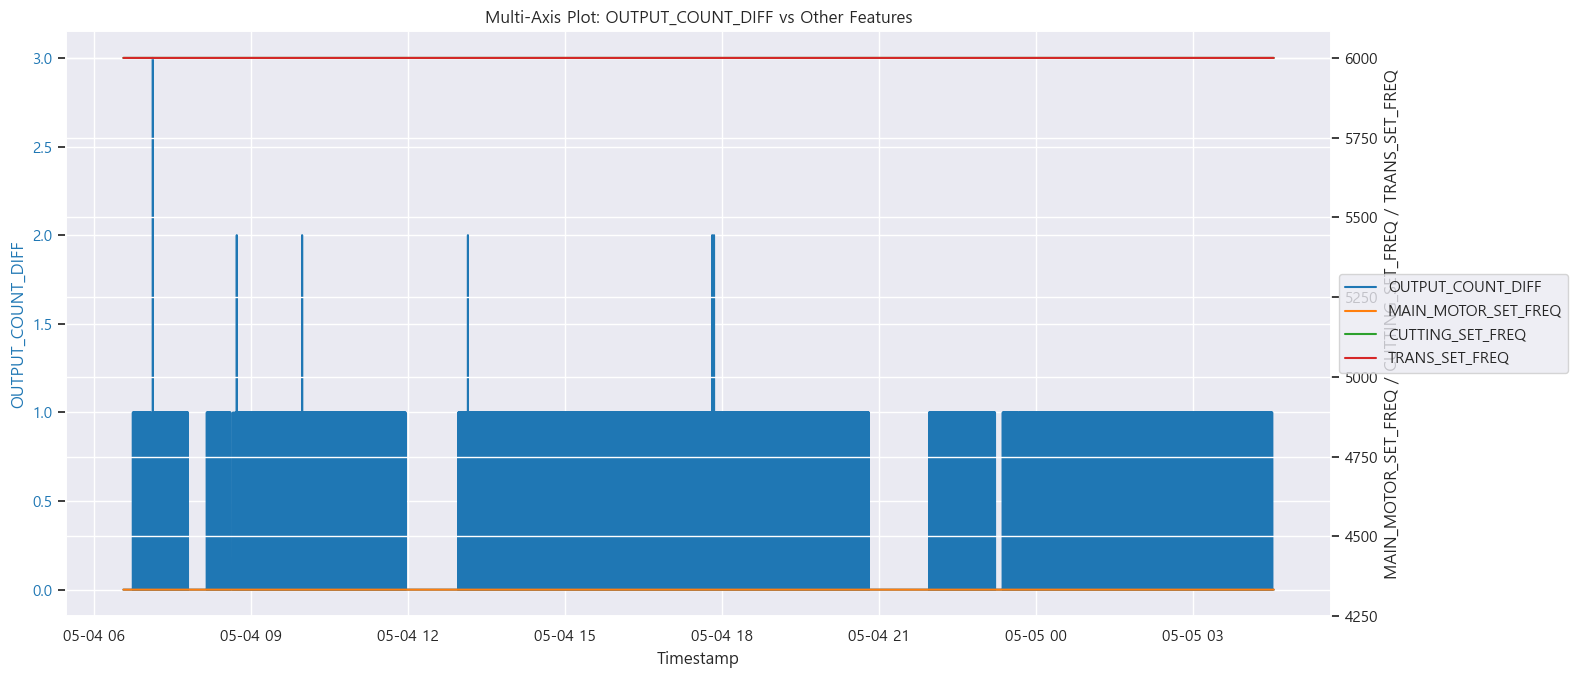

In [11]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['MAIN_MOTOR_SET_FREQ', 'CUTTING_SET_FREQ', 'TRANS_SET_FREQ']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

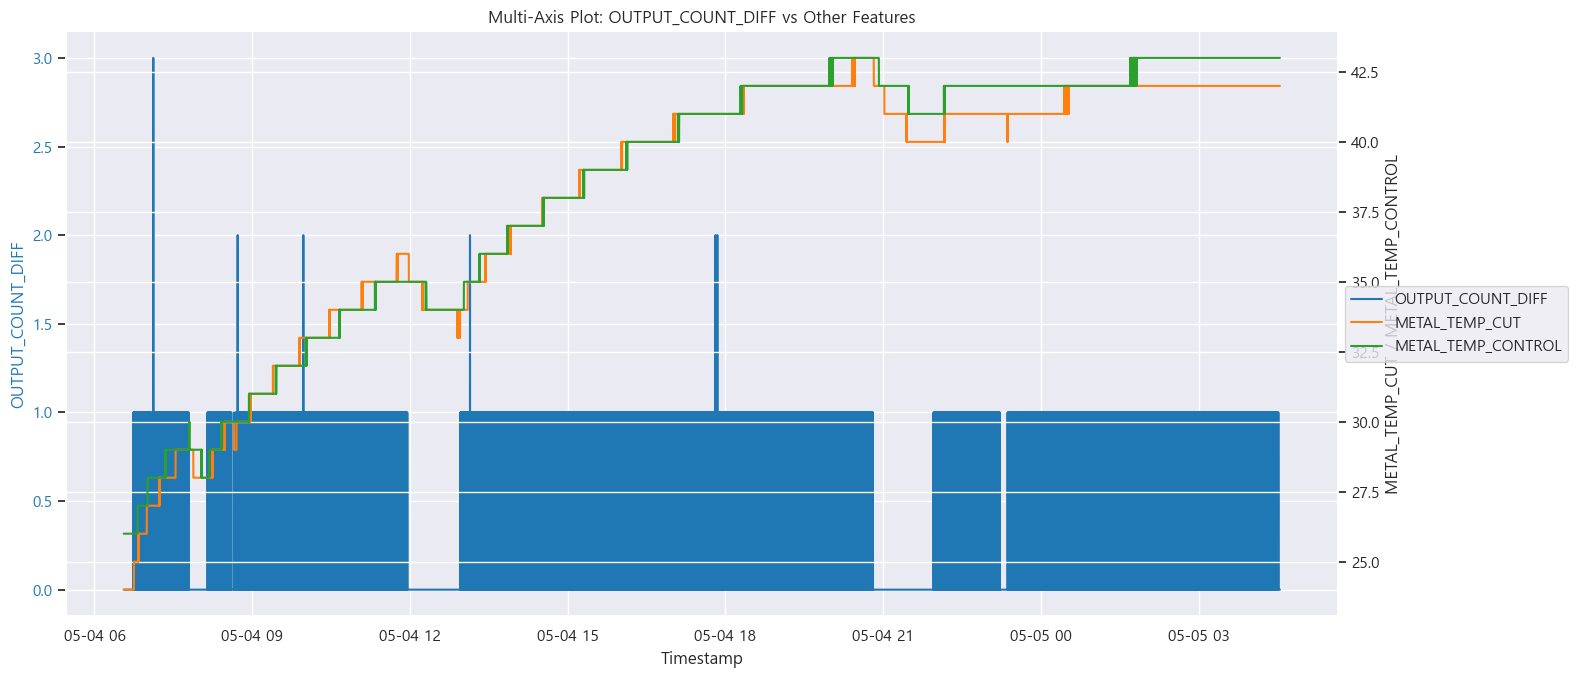

In [12]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-04 06:33:20'
end_date = '2022-05-05 16:59:23'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2022-05-05 16:59:26 ~ 2022-05-06 06:32:52

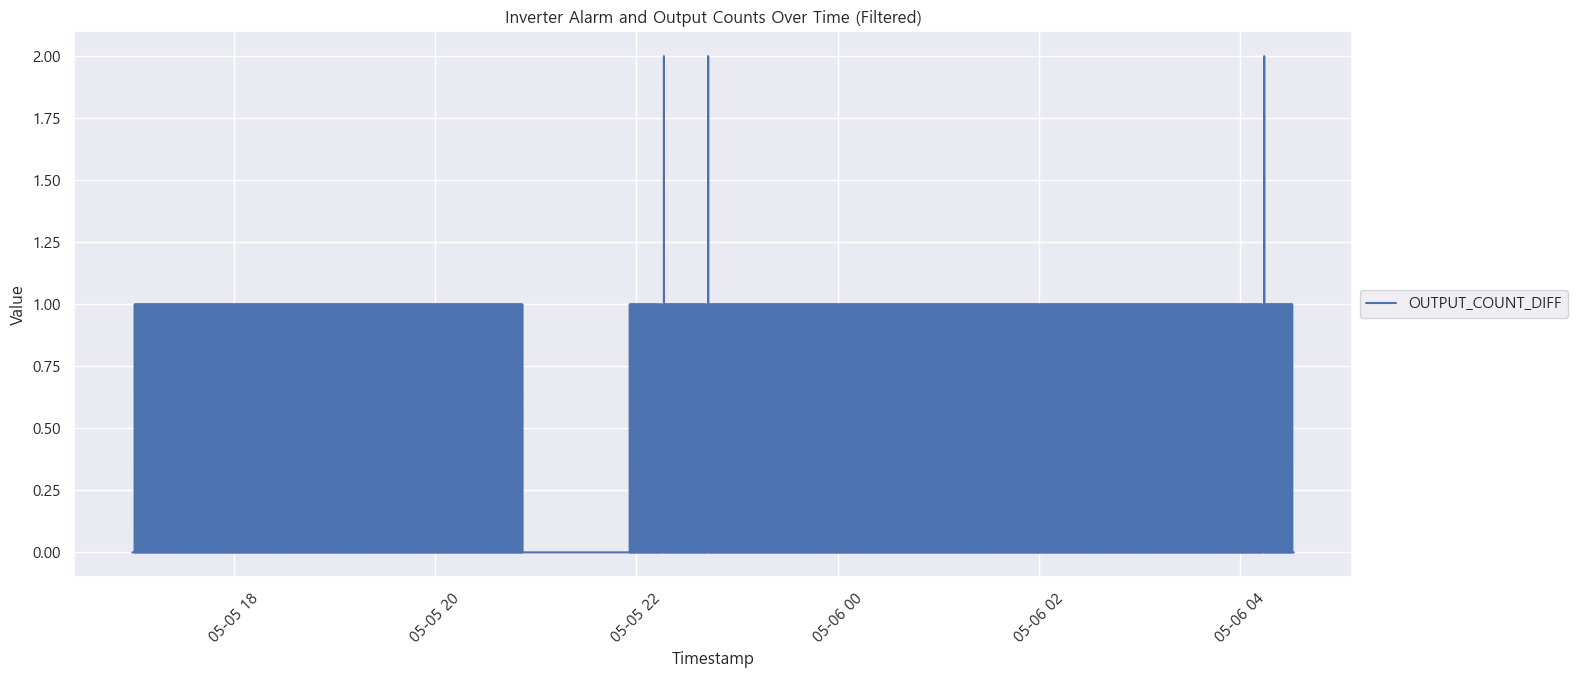

In [13]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-05 16:59:26'
end_date = '2022-05-06 06:32:52'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

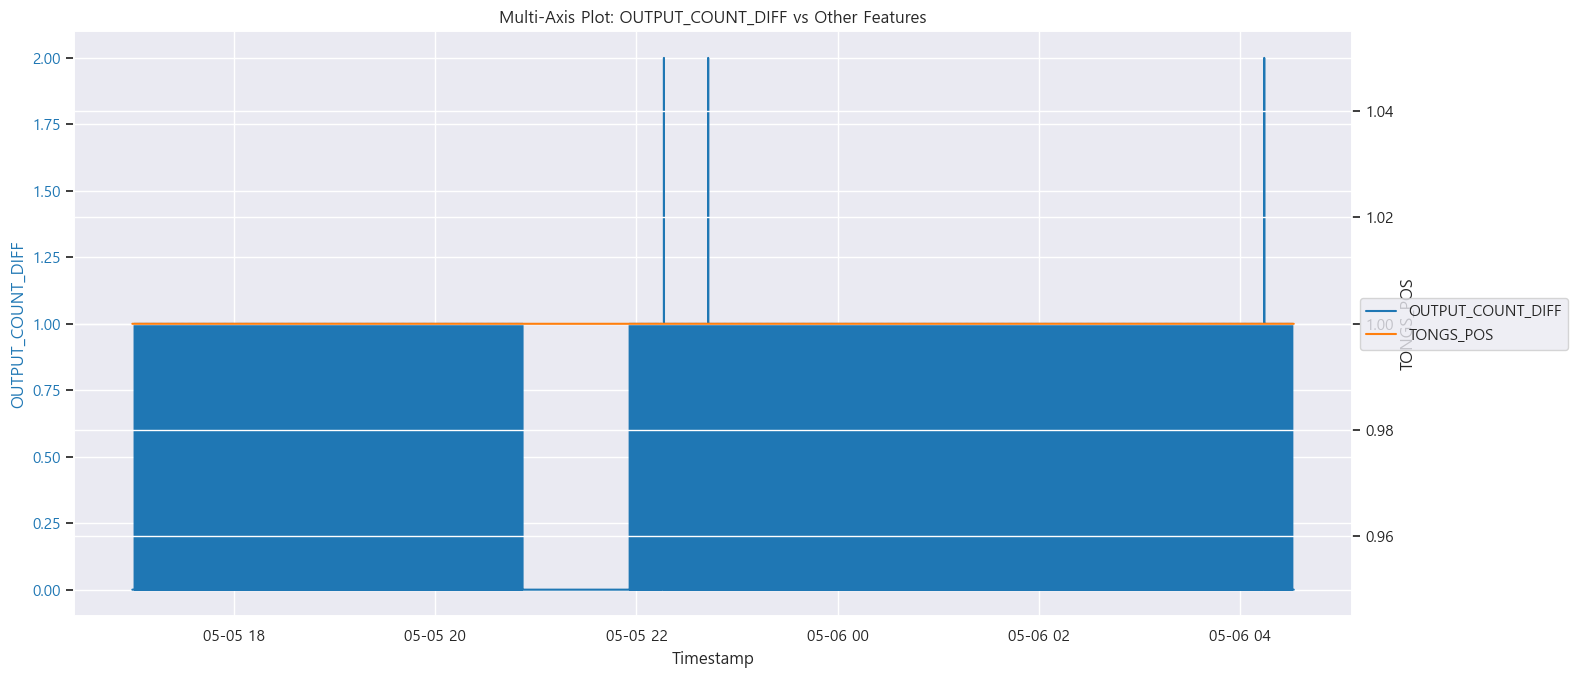

In [14]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['TONGS_POS']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-05 16:59:26'
end_date = '2022-05-06 06:32:52'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

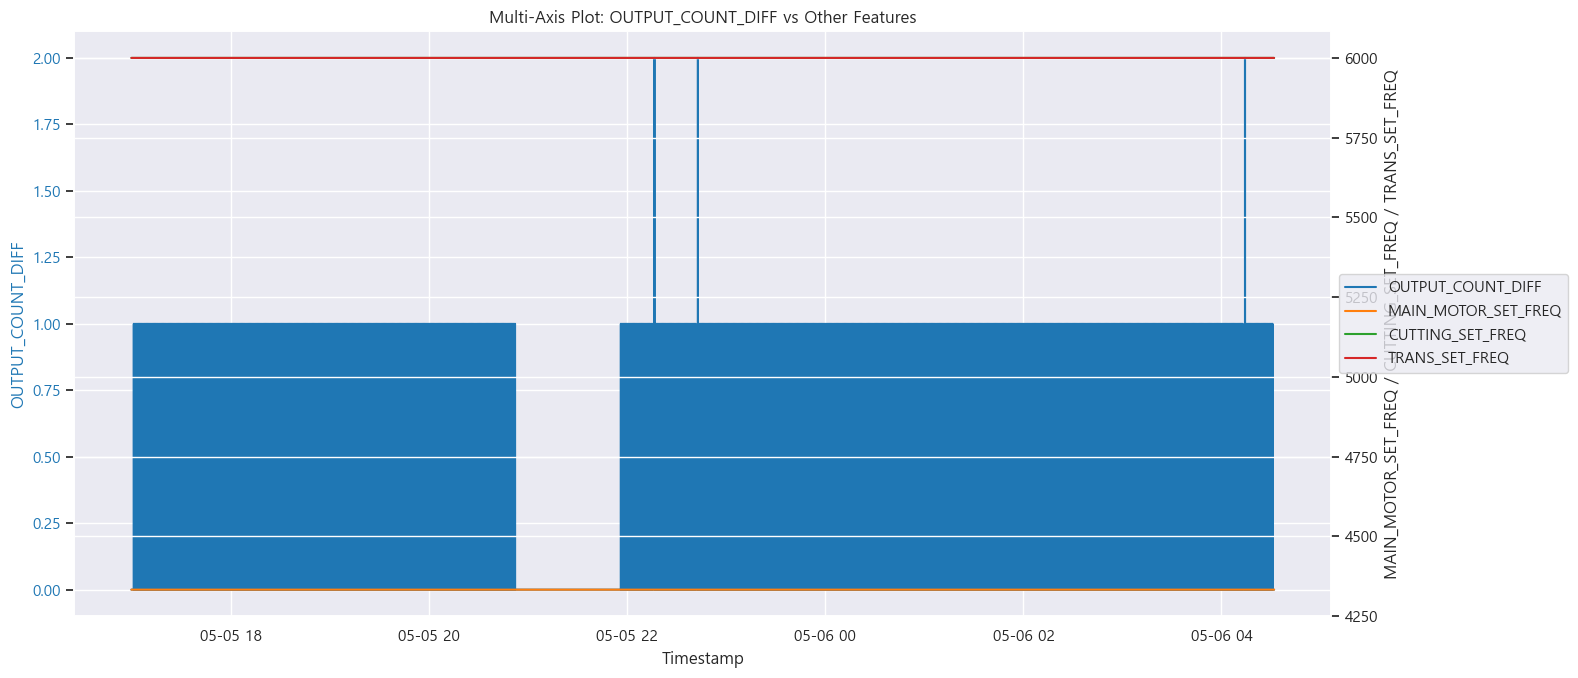

In [15]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['MAIN_MOTOR_SET_FREQ', 'CUTTING_SET_FREQ', 'TRANS_SET_FREQ']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-05 16:59:26'
end_date = '2022-05-06 06:32:52'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

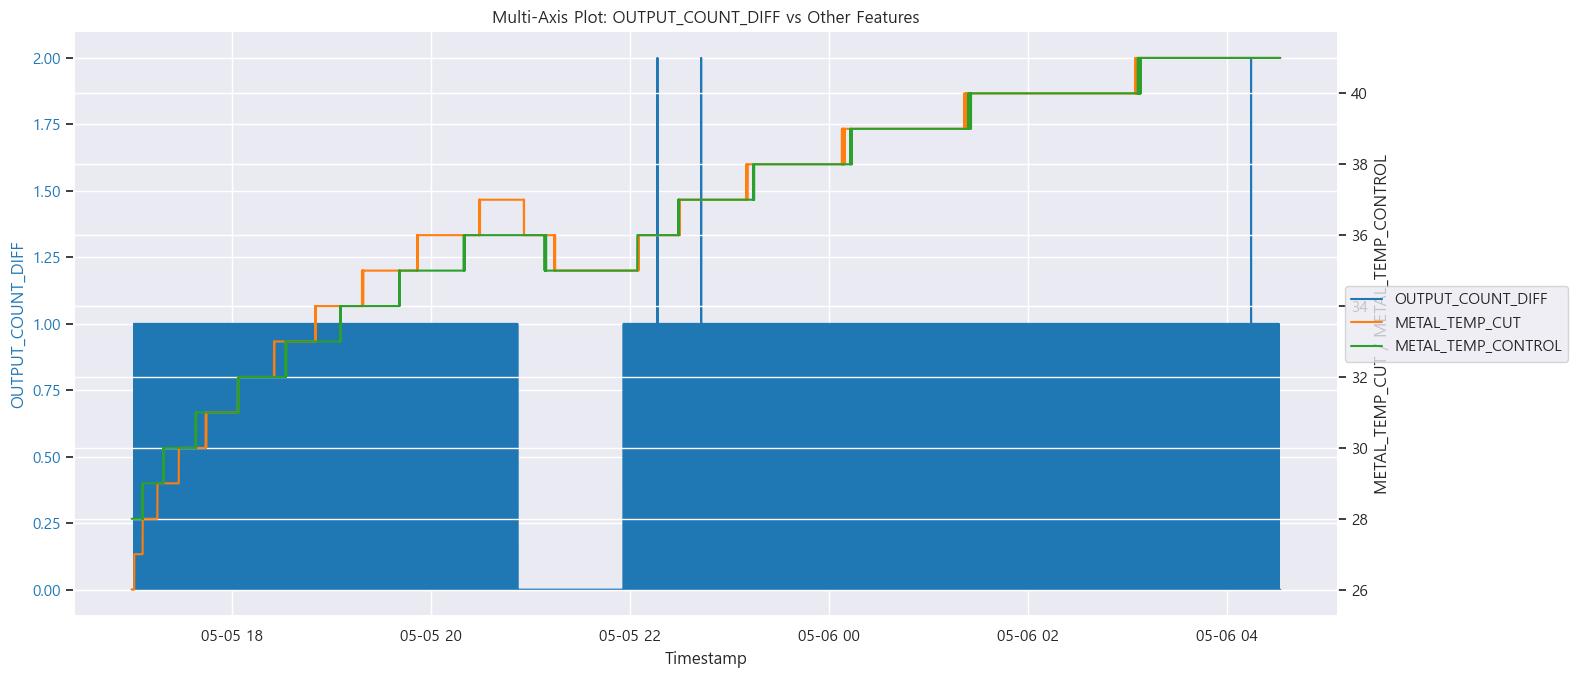

In [16]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-05 16:59:26'
end_date = '2022-05-06 06:32:52'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2022-05-06 06:32:54~2022-05-09 06:31:30

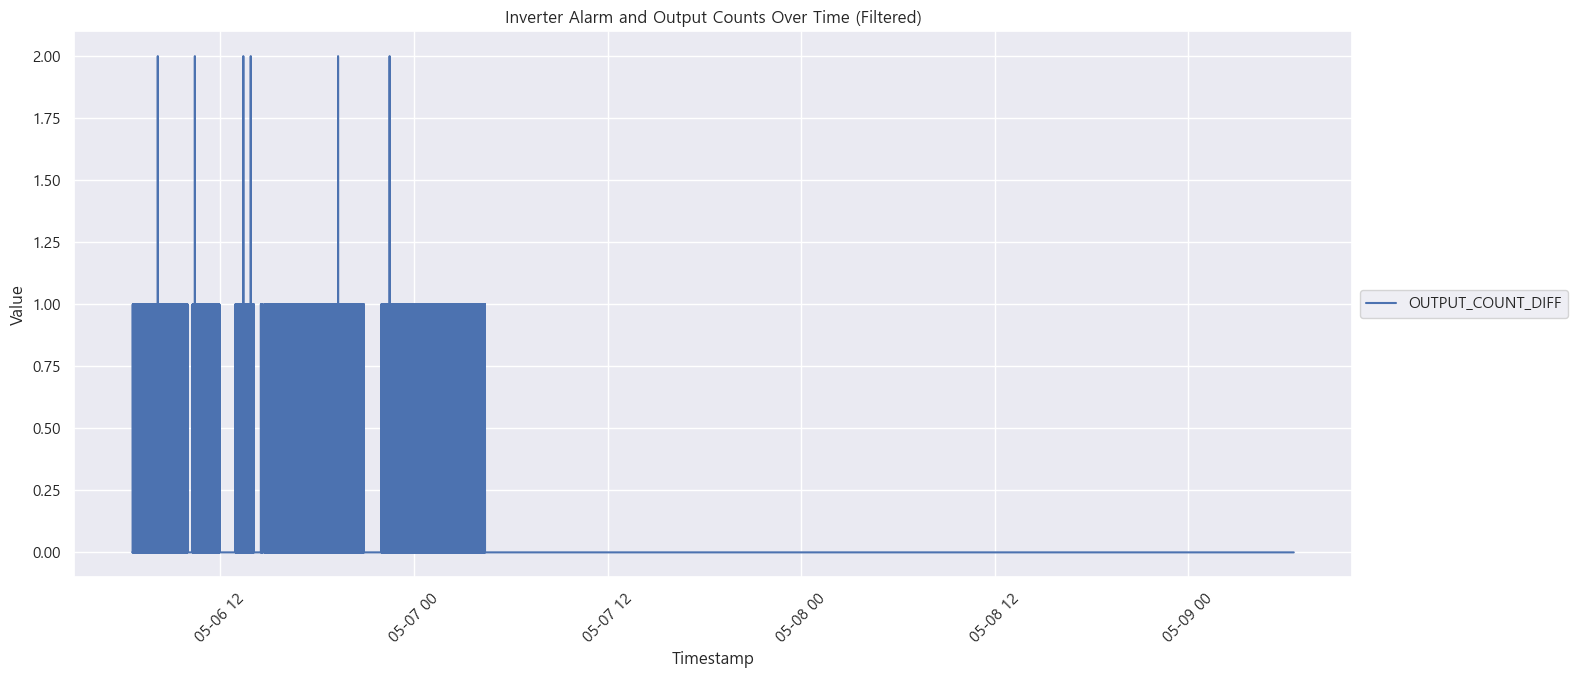

In [17]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

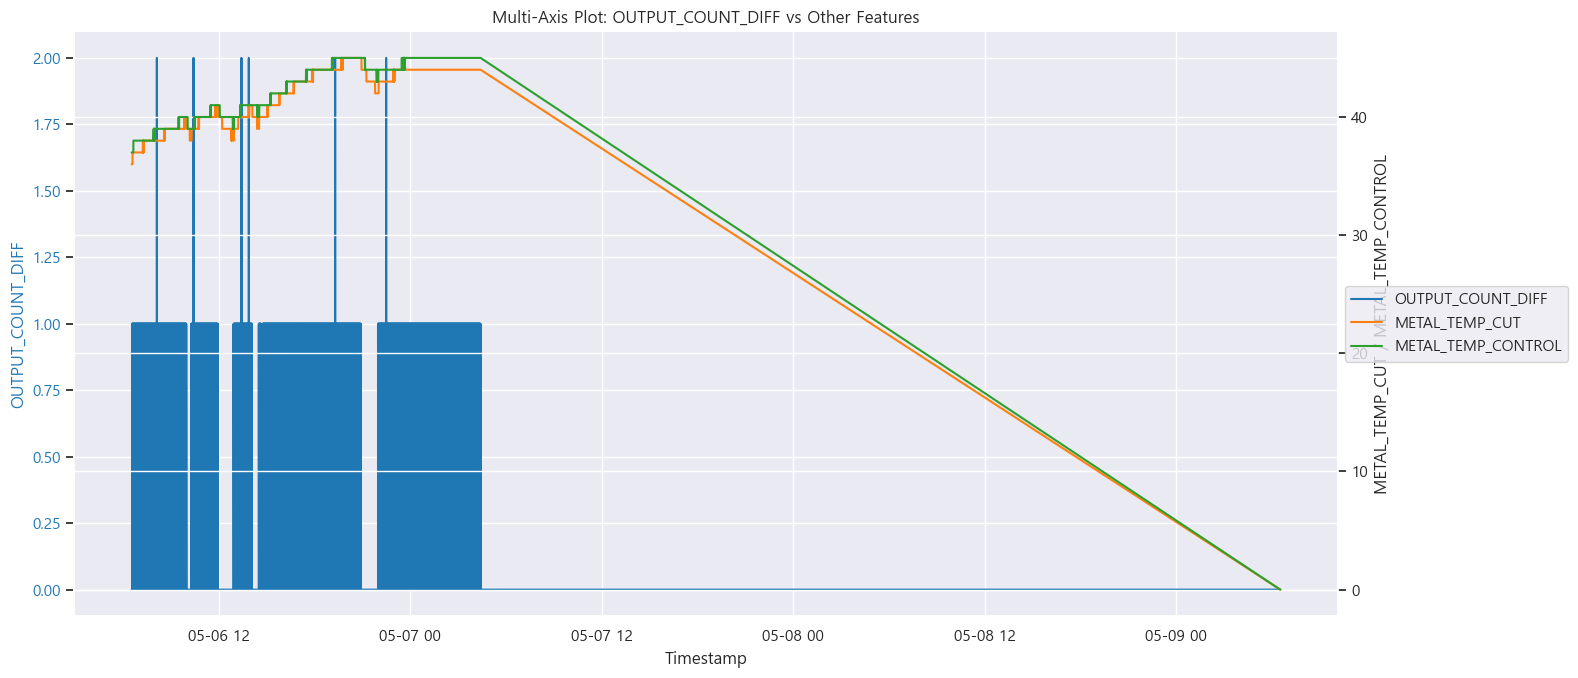

In [18]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-06 06:32:54'
end_date = '2022-05-09 06:31:30'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2022-05-09 06:31:31~2022-05-10 06:30:37

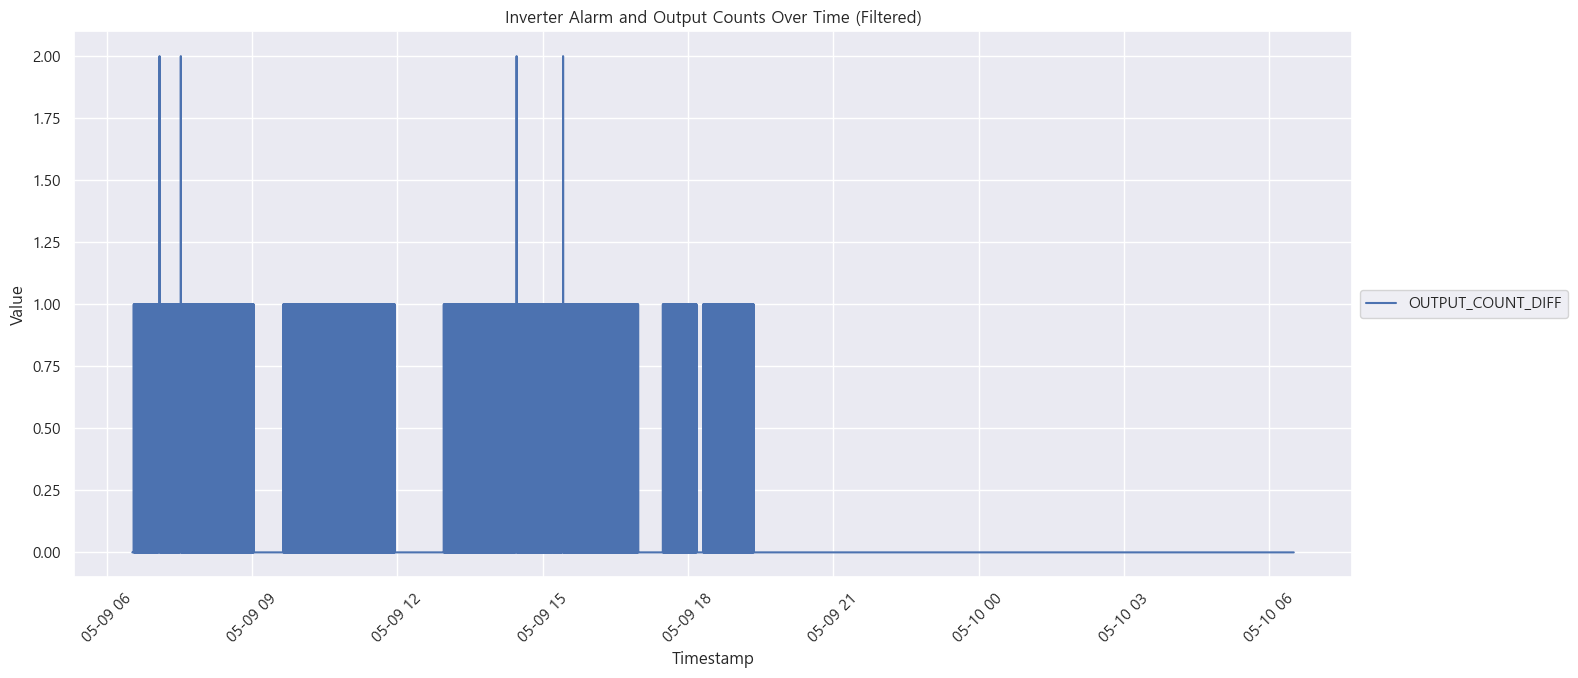

In [19]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-09 06:31:31'
end_date = '2022-05-10 06:30:37'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

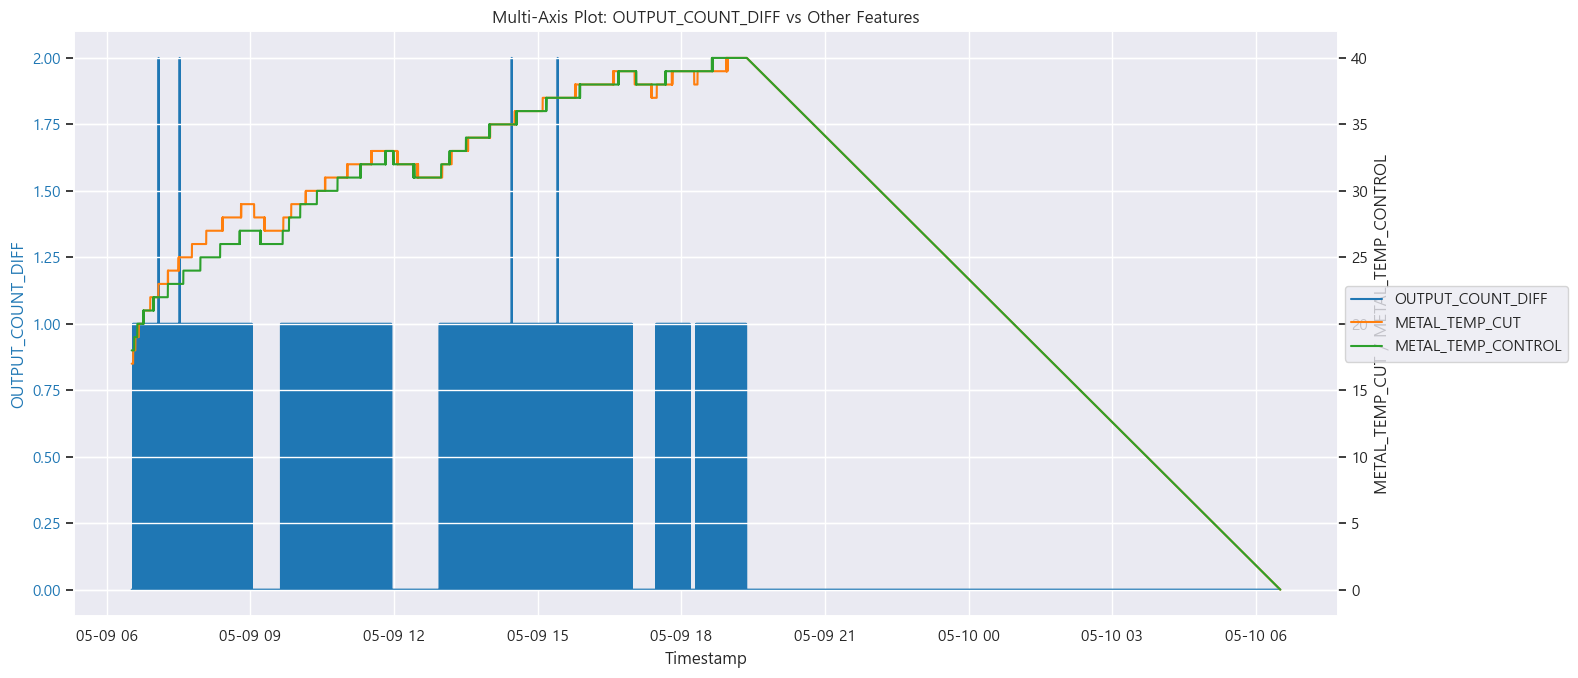

In [20]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-09 06:31:31'
end_date = '2022-05-10 06:30:37'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2022-05-10 06:30:38~2022-05-11 06:34:40

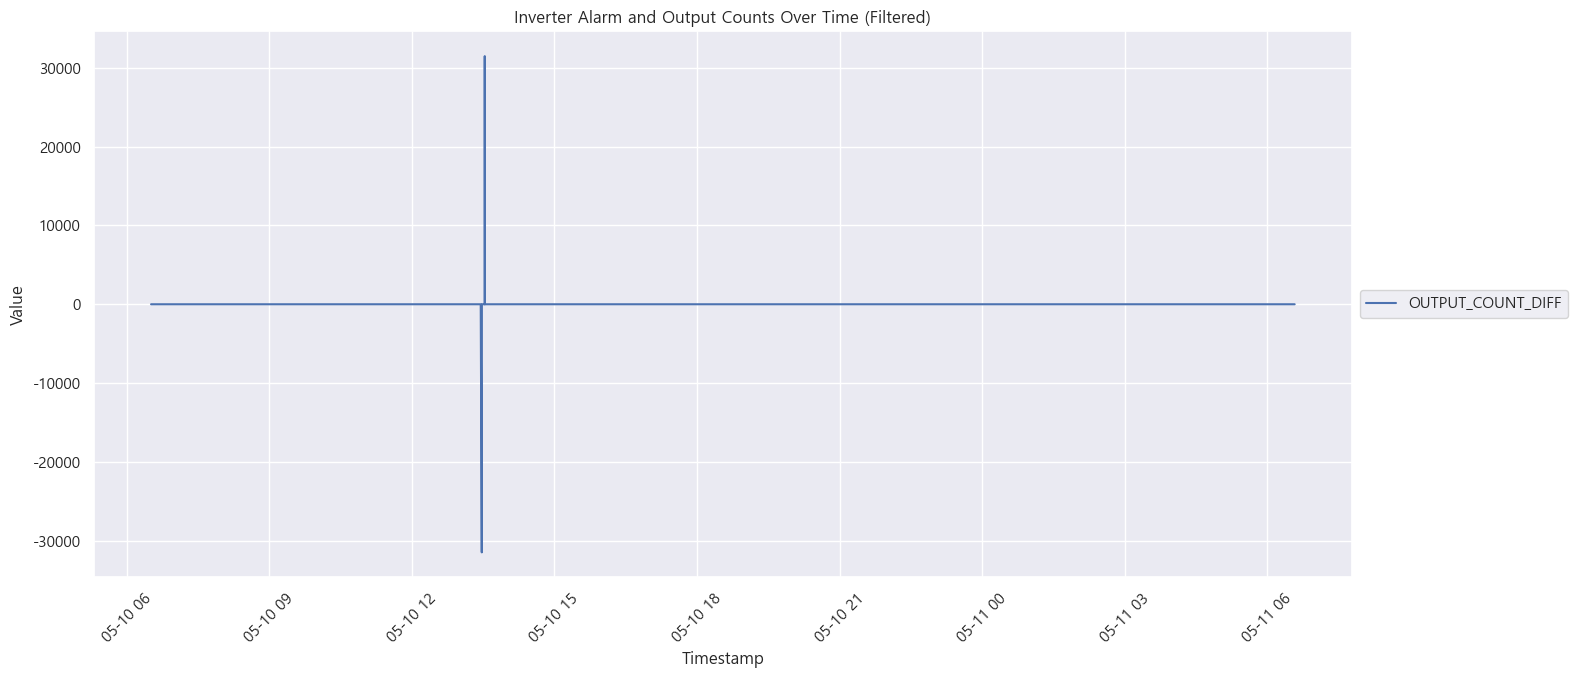

In [21]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-10 06:30:38'
end_date = '2022-05-11 06:34:40'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

In [22]:
df_filtered['OUTPUT_COUNT_DIFF'].value_counts()

OUTPUT_COUNT_DIFF
 0.0        45337
 1.0          859
 2.0            1
-31495.0        1
 31496.0        1
Name: count, dtype: int64

In [23]:
df1 = df1.drop(index=df1[df1['OUTPUT_COUNT_DIFF'].isin([-31495.0, 31496.0])].index)

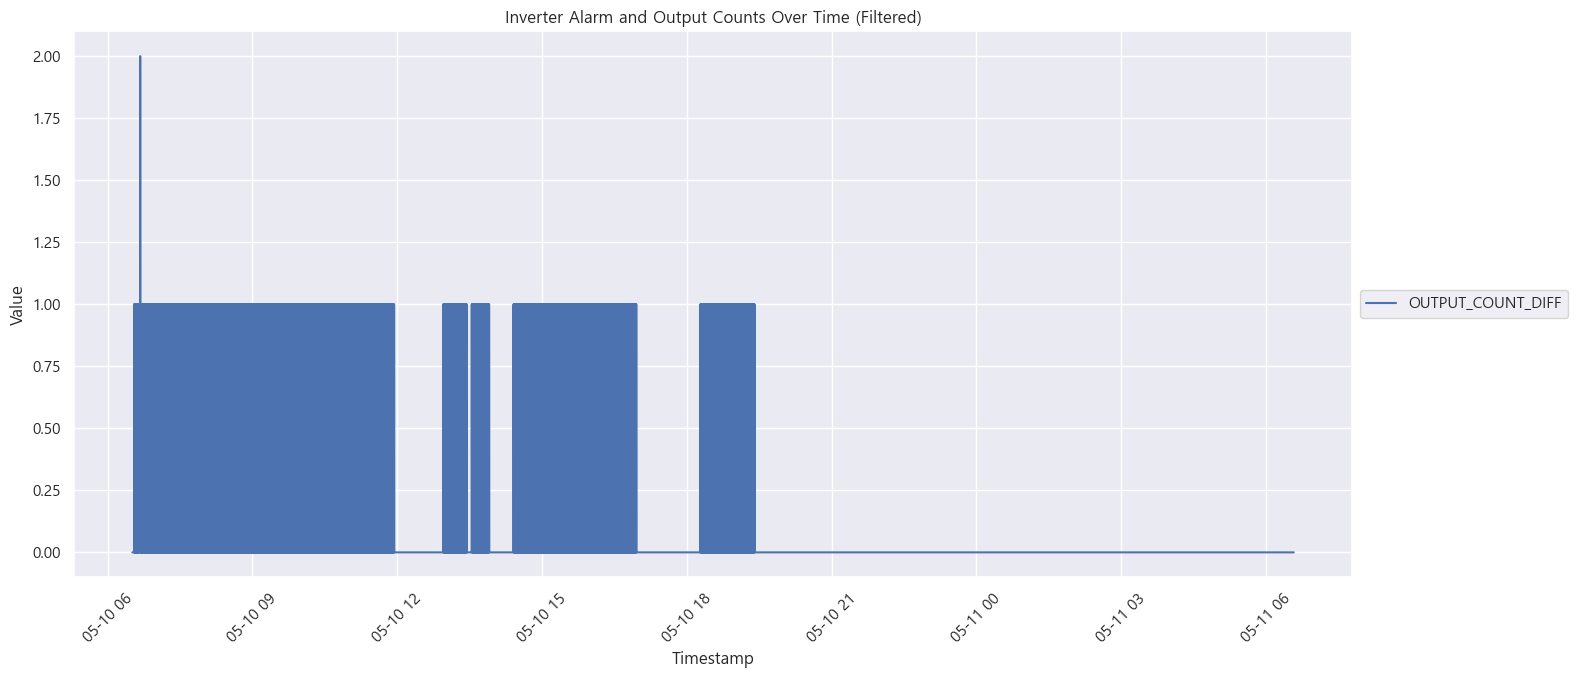

In [24]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-10 06:30:38'
end_date = '2022-05-11 06:34:40'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

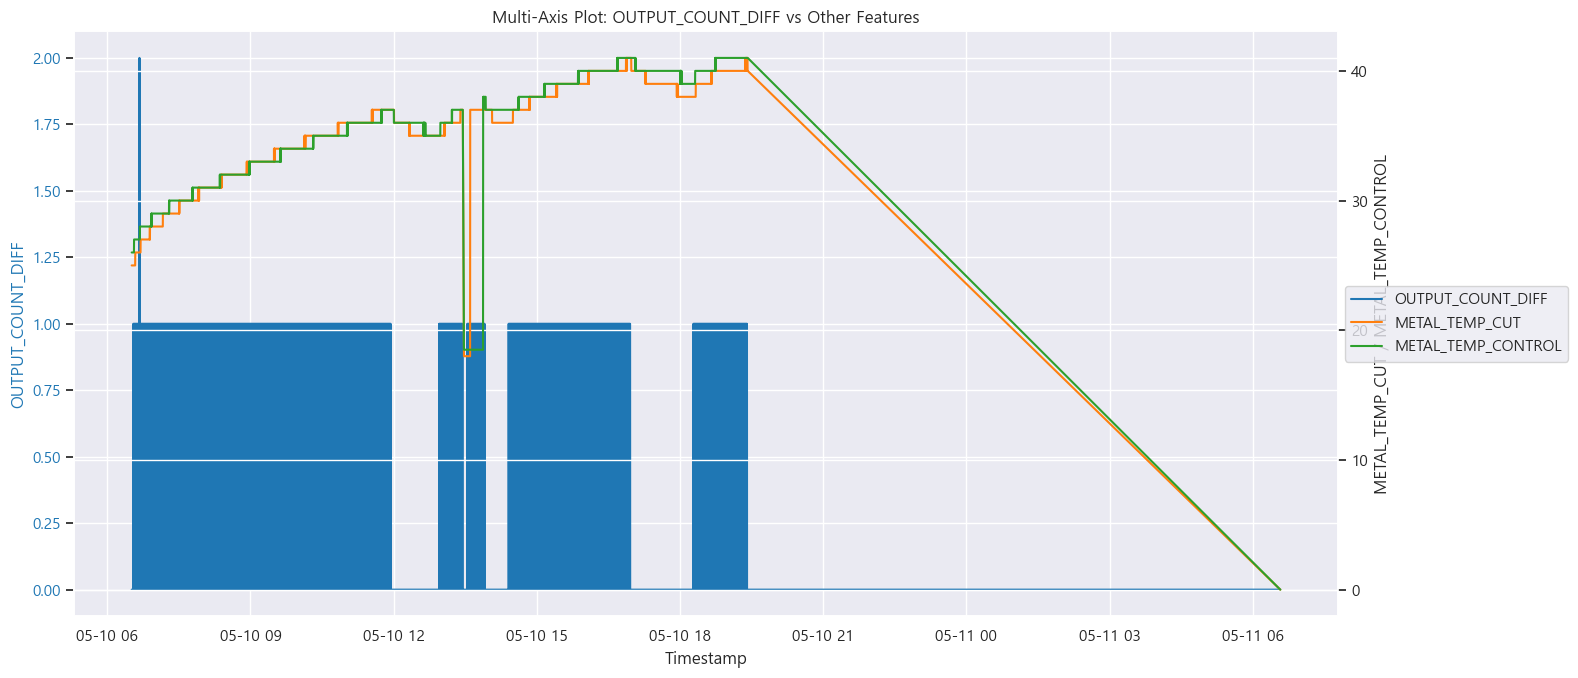

In [25]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = [ 'METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-10 06:30:38'
end_date = '2022-05-11 06:34:40'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2022-05-11 06:34:41 ~ 2022-05-12 06:38:00

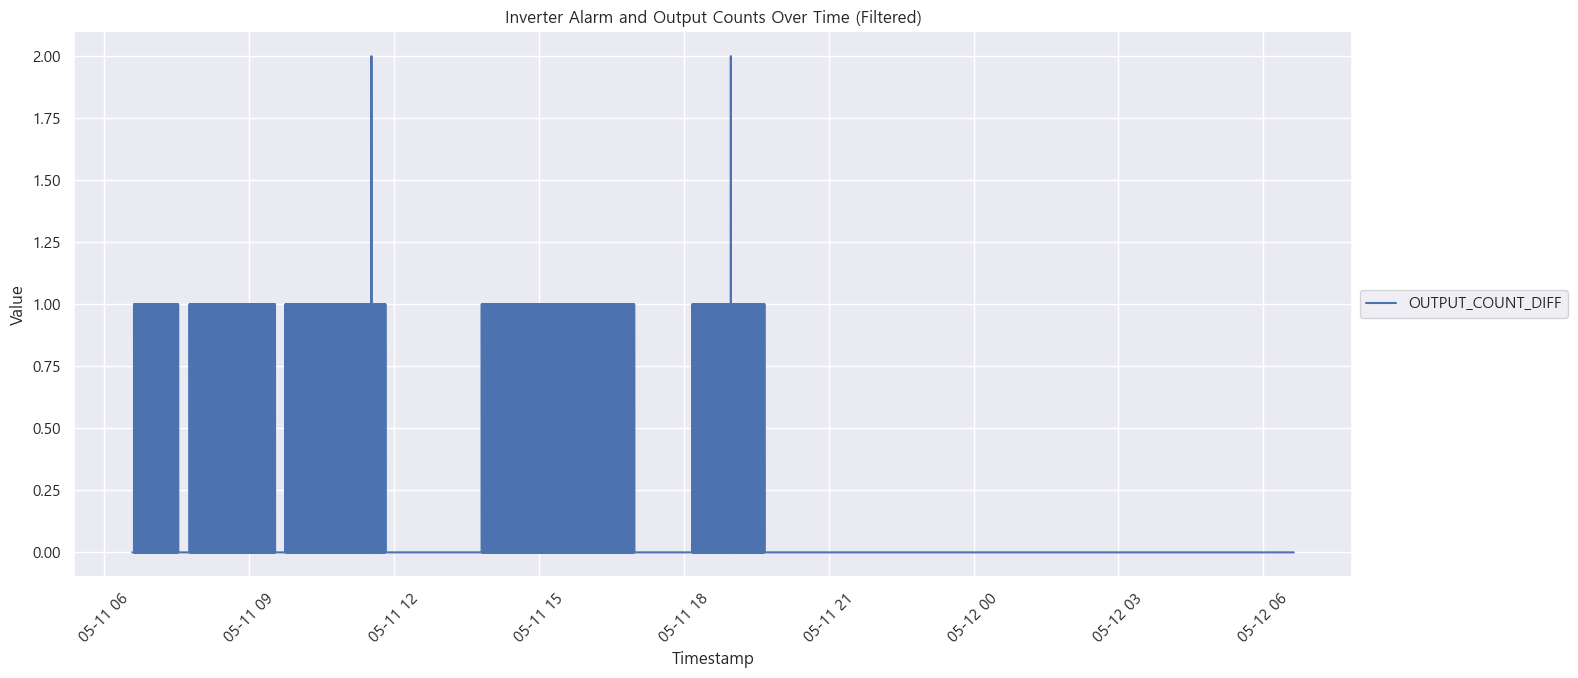

In [26]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-11 06:34:41'
end_date = '2022-05-12 06:38:00'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

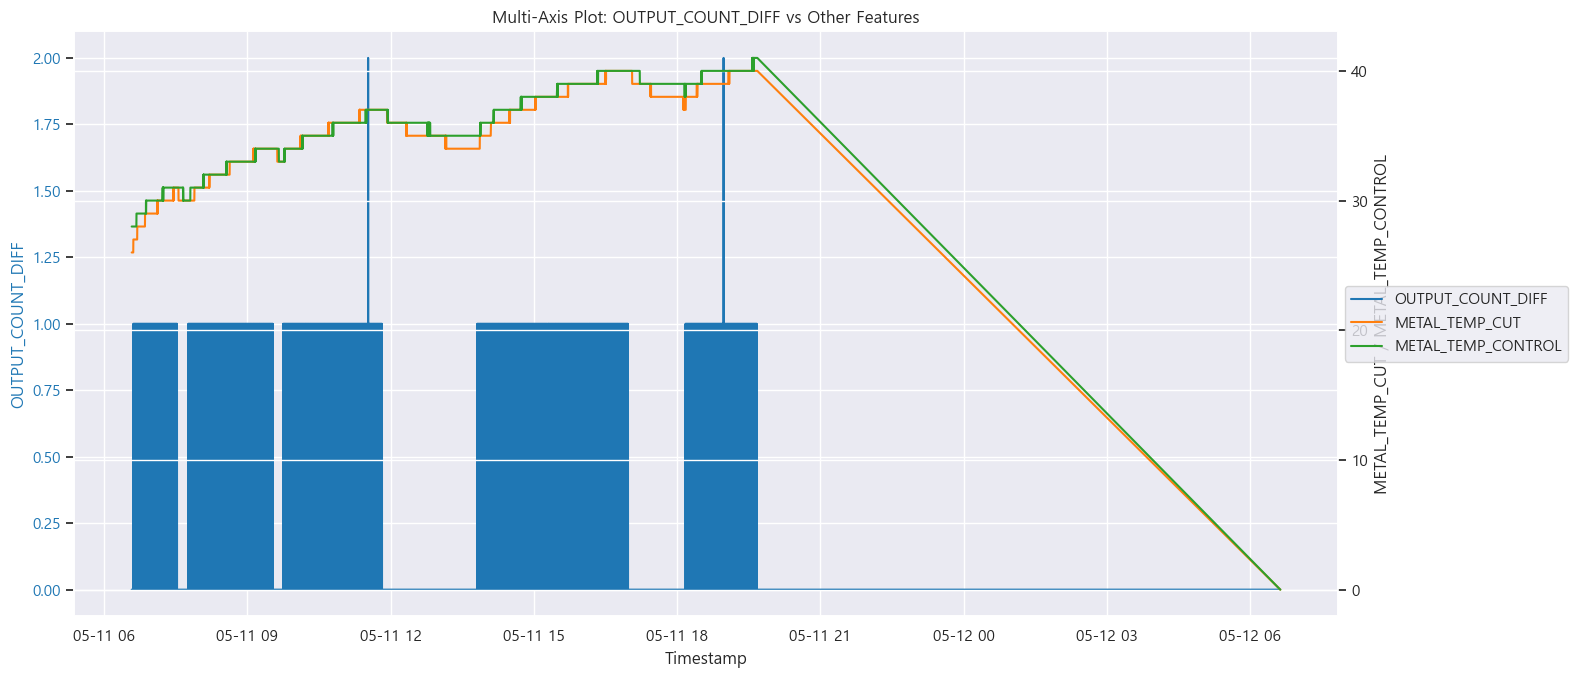

In [27]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-11 06:34:41'
end_date = '2022-05-12 06:38:00'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2022-05-12 06:38:01~ 2022-05-13 02:07:11

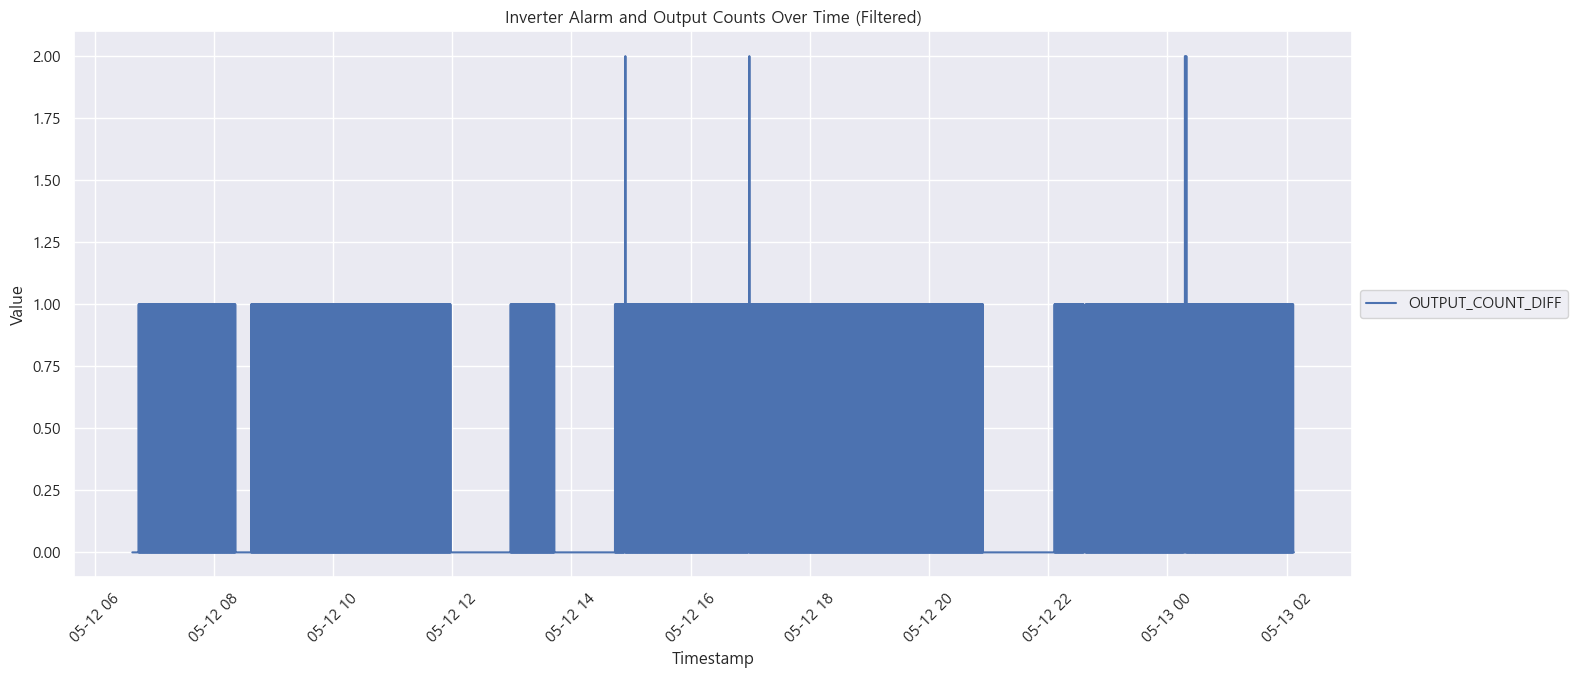

In [28]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-12 06:38:01'
end_date = '2022-05-13 02:07:11'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

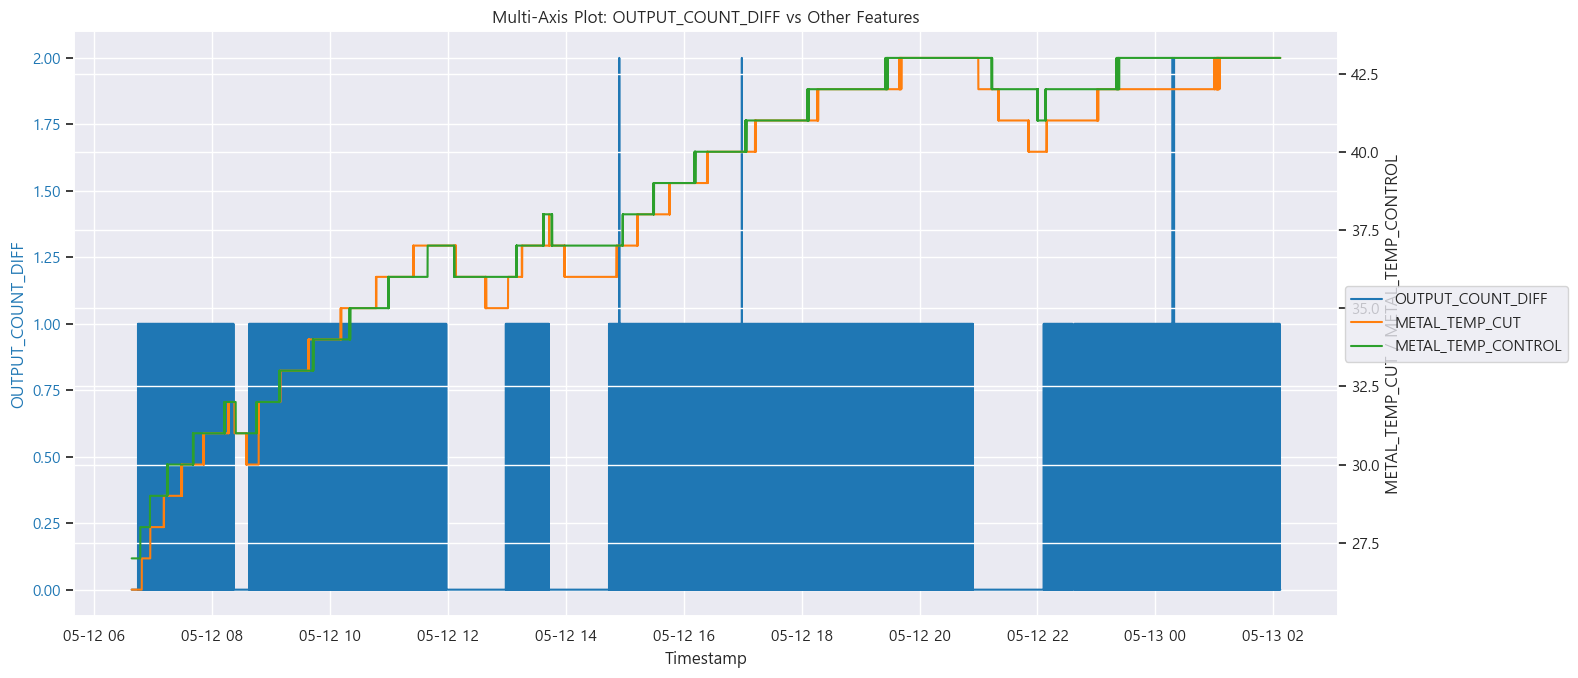

In [29]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = [ 'METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-12 06:38:01'
end_date = '2022-05-13 02:07:11'
mask = (df1['Timestamp'] >= start_date) & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2022-05-13 02:07:51~

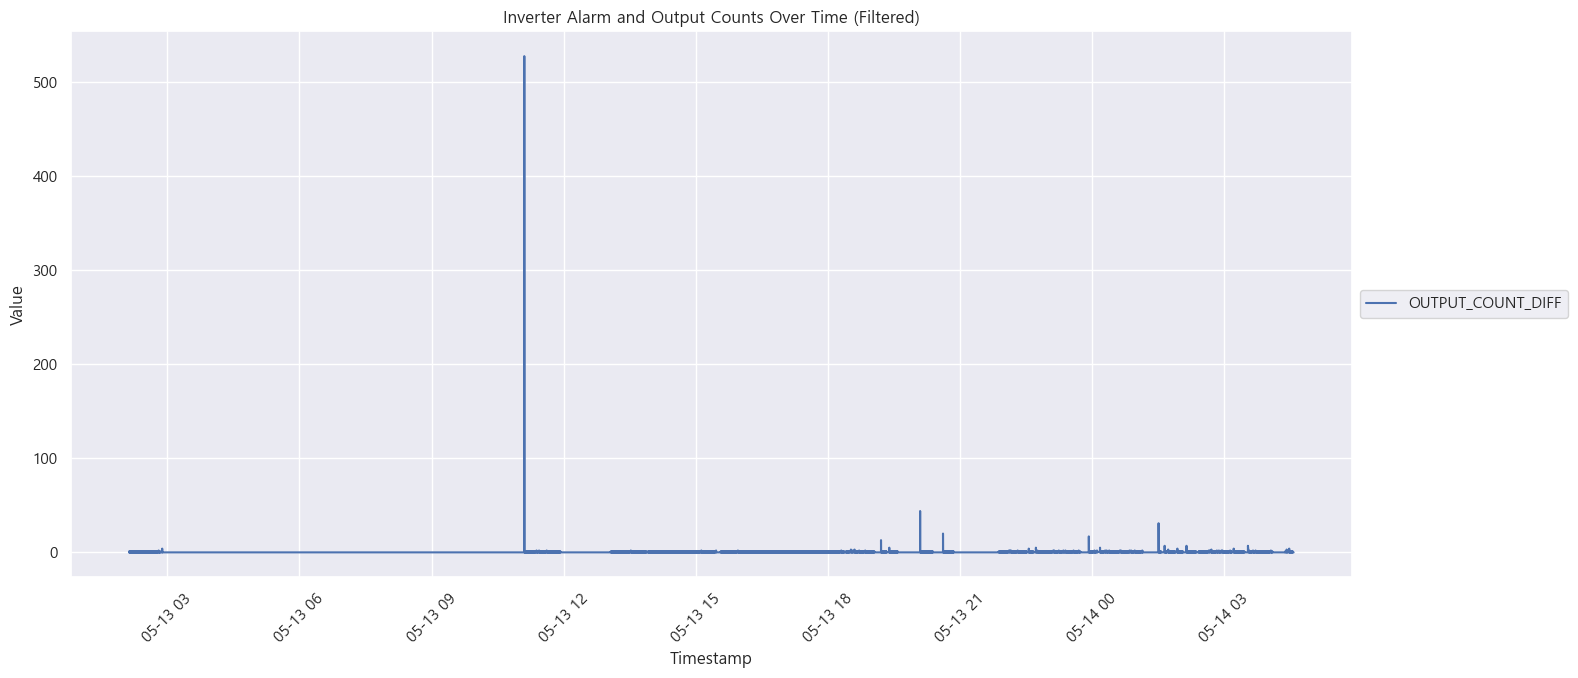

In [30]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-13 02:07:51'
# end_date = '2022-05-13 02:07:11'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
# df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) 
# & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

In [31]:
df_filtered['OUTPUT_COUNT_DIFF'].value_counts()

OUTPUT_COUNT_DIFF
0.0      45107
1.0       1063
2.0         46
4.0          5
3.0          5
5.0          3
7.0          3
528.0        1
13.0         1
44.0         1
20.0         1
17.0         1
31.0         1
Name: count, dtype: int64

In [32]:
df1 = df1.drop(index=df1[df1['OUTPUT_COUNT_DIFF'].isin([528])].index)

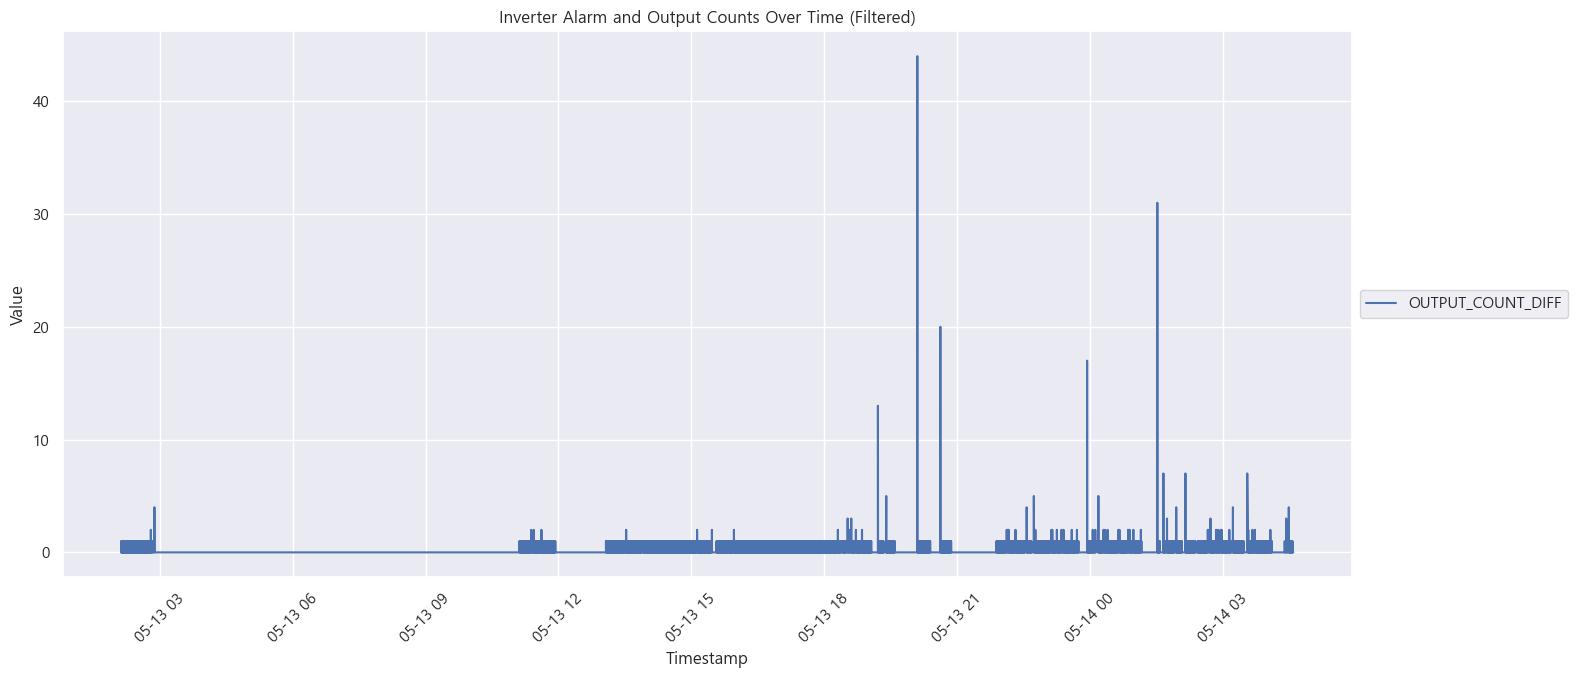

In [33]:
# ✅ 1. 사용 컬럼 목록
cols_to_plot = ['OUTPUT_COUNT_DIFF']

# ✅ 2. Timestamp 컬럼이 datetime 형식인지 확인
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])

# ✅ 3. 타임스탬프 필터링 (예: 2023-05-06 ~ 2023-05-07)
start_date = '2022-05-13 02:07:51'
# end_date = '2022-05-13 02:07:11'

# 해당 날짜에 해당하는 행의 OUTPUT_COUNT_SUM 값을 0으로 설정
df1.loc[df1['Timestamp'] == pd.to_datetime(start_date), 'OUTPUT_COUNT_DIFF'] = 0
# df1.loc[df1['Timestamp'] == pd.to_datetime(end_date), 'OUTPUT_COUNT_DIFF'] = 0

mask = (df1['Timestamp'] >= start_date) 
# & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 4. 그래프 그리기
plt.figure(figsize=(16, 7))

for col in cols_to_plot:
    plt.plot(df_filtered['Timestamp'], df_filtered[col], label=col)

# ✅ 5. 그래프 스타일 설정
plt.title('Inverter Alarm and Output Counts Over Time (Filtered)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))  # 오른쪽 범례
plt.tight_layout()
plt.grid(True)

plt.show()

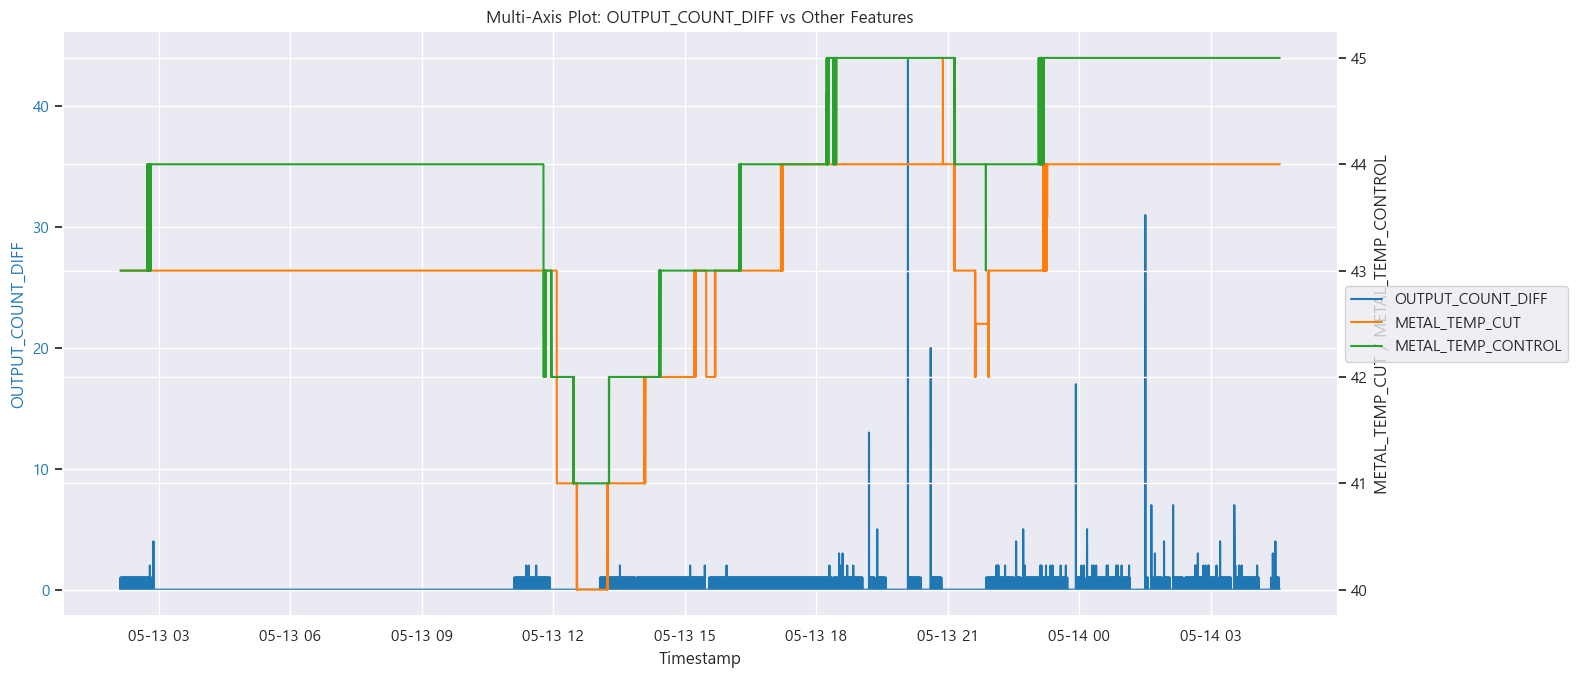

In [34]:
# ✅ 1. 사용할 컬럼 리스트 정의
left_y_cols = ['OUTPUT_COUNT_DIFF']
right_y_cols = ['METAL_TEMP_CUT', 'METAL_TEMP_CONTROL']  # 여기에 추가 컬럼 적기

# ✅ 2. Timestamp 형식 확인 및 필터링
df1['Timestamp'] = pd.to_datetime(df1['Timestamp'])
start_date = '2022-05-13 02:07:51'
# end_date = '2022-05-13 02:07:11'
mask = (df1['Timestamp'] >= start_date) 
# & (df1['Timestamp'] <= end_date)
df_filtered = df1.loc[mask]

# ✅ 3. 이중 y축 그래프 시작
fig, ax1 = plt.subplots(figsize=(16, 7))

# 왼쪽 y축 (단일 컬럼)
color_left = 'tab:blue'
ax1.plot(df_filtered['Timestamp'], df_filtered[left_y_cols[0]], color=color_left, label=left_y_cols[0])
ax1.set_xlabel('Timestamp')
ax1.set_ylabel(left_y_cols[0], color=color_left)
ax1.tick_params(axis='y', labelcolor=color_left)
ax1.grid(True)

# 오른쪽 y축 (다중 컬럼)
ax2 = ax1.twinx()

colors_right = ['tab:orange', 'tab:green', 'tab:red', 'tab:purple']  # 필요시 색 추가
for i, col in enumerate(right_y_cols):
    ax2.plot(df_filtered['Timestamp'], df_filtered[col], label=col, color=colors_right[i % len(colors_right)])

ax2.set_ylabel(' / '.join(right_y_cols))
ax2.tick_params(axis='y')

# ✅ 4. 범례 통합
lines_1, labels_1 = ax1.get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
ax2.legend(lines_1 + lines_2, labels_1 + labels_2, loc='center left', bbox_to_anchor=(1, 0.5))

# ✅ 5. 스타일 마무리
plt.title('Multi-Axis Plot: OUTPUT_COUNT_DIFF vs Other Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [35]:
### 'OUTPUT_COUNT_DIFF' = 528 행의 timestamp = 2022-05-13 11:06:24	

In [36]:
zero_output = df1[df1['STATUS'] == 1.0]
print("OUTPUT_COUNT_SUM == 0인 Timestamp:")
print(zero_output['Timestamp'].unique())

OUTPUT_COUNT_SUM == 0인 Timestamp:
<DatetimeArray>
['2022-05-13 11:55:52', '2022-05-13 11:55:53', '2022-05-13 11:55:54',
 '2022-05-13 11:55:55', '2022-05-13 11:55:56', '2022-05-13 11:55:57',
 '2022-05-13 11:55:58', '2022-05-13 11:55:59', '2022-05-13 11:56:00',
 '2022-05-13 11:56:01',
 ...
 '2022-05-13 13:03:43', '2022-05-13 13:03:44', '2022-05-13 13:03:45',
 '2022-05-13 13:03:46', '2022-05-13 13:03:47', '2022-05-13 13:03:48',
 '2022-05-13 13:03:49', '2022-05-13 13:03:50', '2022-05-13 13:03:51',
 '2022-05-13 13:03:52']
Length: 4075, dtype: datetime64[ns]
